In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
sms_df=pd.read_csv('./spam.csv', encoding='latin-1')

In [4]:
sms_df.dropna(how='any',axis=1,inplace=True)

In [5]:
sms_df.columns=['Tag','Message']

In [6]:
sms_df.describe()

,Tag,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
sms_df['Tag'].unique()
sms_df['Tag']=np.where(sms_df['Tag']=='spam',1,0)


In [8]:
sms_df.head()

,Tag,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [10]:
X_train,X_test,y_train,y_test=train_test_split(sms_df['Message'],sms_df['Tag'],random_state=0)


In [11]:
# CountVectorizer
count=CountVectorizer().fit(X_train)
X_train_Count=count.transform(X_train)
X_test_count=count.transform(X_test)

#TfidfVectorizer

Tfid=TfidfVectorizer().fit(X_train)
X_train_Tfid=Tfid.transform(X_train)
X_test_Tfid=Tfid.transform(X_test)

In [12]:
clf_count=MultinomialNB(alpha=0.1)
clf_count.fit(X_train_Count,y_train)
pred=clf_count.predict(X_test_count)

In [13]:
clf_Tfid=MultinomialNB(alpha=0.1)
clf_Tfid.fit(X_train_Tfid,y_train)
pred=clf_Tfid.predict(X_test_Tfid)


In [14]:
feature_names=np.array(count.get_feature_names())
count_coefficients=clf_count.coef_[0].argsort()

print('Smallest 20  Count vectorizer coefficients:\n')
print(feature_names[count_coefficients[:20]])
print('\n\n')
print('Largest 20  Count vectorizer coefficients:\n')
print(feature_names[count_coefficients[-21:-1]])

Smallest 20  Count vectorizer coefficients:

['kaiez' 'needy' 'needs' 'needing' 'needed' 'needa' 'ned' 'necklace'
 'neck' 'necessity' 'necessary' 'necessarily' 'necesity' 'nearer' 'nearby'
 'near' 'ne' 'nbme' 'nb' 'nav']



Largest 20  Count vectorizer coefficients:

['with' 'claim' 'and' 'have' 'mobile' 'from' 'text' 'on' 'stop' 'ur' 'is'
 'txt' 'or' 'now' 'the' 'for' 'free' 'your' 'you' 'call']


In [15]:
feature_names=np.array(Tfid.get_feature_names())
Tfid_coefficients=clf_Tfid.coef_[0].argsort()

print('Smallest 20  Tfid vectorizer coefficients:\n')
print(feature_names[Tfid_coefficients[:20]])
print('\n\n')
print('Largest 20  Tfid vectorizer coefficients:\n')
print(feature_names[Tfid_coefficients[-21:-1]])

Smallest 20  Tfid vectorizer coefficients:

['kaiez' 'needy' 'needs' 'needing' 'needed' 'needa' 'ned' 'necklace'
 'neck' 'necessity' 'necessary' 'necessarily' 'necesity' 'nearer' 'nearby'
 'near' 'ne' 'nbme' 'nb' 'nav']



Largest 20  Tfid vectorizer coefficients:

['have' 'prize' 'reply' 'www' 'is' 'the' 'from' 'ur' 'claim' 'text'
 'mobile' 'stop' 'for' 'now' 'or' 'you' 'txt' 'your' 'free' 'call']


In [16]:
from sklearn.dummy import DummyClassifier

dummy=DummyClassifier(strategy='prior').fit(X_train_Count,y_train)

In [17]:
dummy_predict=dummy.predict(X_test_count)


In [18]:
sum1=X_train_Count.sum(axis=0)


In [19]:
data=[]

for col,features in enumerate(count.get_feature_names()):
    data.append([features,sum1[0,col]])
    
feature_data=pd.DataFrame(data,columns=['Feature','Score'])
feature_data.sort_values(by='Score',inplace=True)

print('20 features with lowest score')

print(feature_data.head(20).sort_values(by='Score',ascending=False))

print('20 features with highest score')
print(feature_data.tail(20).sort_values(by='Score',ascending=False))

20 features with lowest score
         Feature  Score
7353      ûówell      1
2755       flute      1
2772       fones      1
5339     referin      1
2770      fondly      1
2769        fond      1
2768     follows      1
5340   reffering      1
5341    refilled      1
5342  reflection      1
5343   refreshed      1
2763        fold      1
2762          fo      1
2761         fne      1
2760         fml      1
2759          fm      1
2758       flyng      1
2757      flying      1
5344      refund      1
5338  references      1
20 features with highest score
     Feature  Score
6561      to   1670
7305     you   1661
6446     the    977
896      and    716
3445      in    707
3548      is    666
4163      me    580
4407      my    568
3558      it    559
2782     for    517
7310    your    482
4622      of    458
1519    call    452
3178    have    432
6440    that    426
4663      on    390
4576     now    367
1541     can    361
977      are    360
5944      so    337


In [20]:

data1=[]

Tf_sum=X_train_Tfid.sum(axis=0)

for col,features in enumerate(Tfid.get_feature_names()):
    data1.append([features,Tf_sum[0,col]])
    
feature_data=pd.DataFrame(data1,columns=['Feature','Score'])
feature_data.sort_values(by='Score',inplace=True)

print('20 features with lowest score')
print('\n')

print(feature_data.head(20).sort_values(by='Score',ascending=False))
print('\n\n')
print('20 features with highest score')
print('\n')
print(feature_data.tail(20).sort_values(by='Score',ascending=False))

20 features with lowest score


           Feature     Score
5768     shivratri  0.091250
1697     childrens  0.091250
2586  exterminator  0.074475
1833     companion  0.074475
1046      athletic  0.074475
1676          chef  0.074475
5184       pudunga  0.074475
3196        healer  0.074475
3919      listener  0.074475
6305   sympathetic  0.074475
689         aaniye  0.074475
4887          pest  0.074475
2172    determined  0.074475
5176  psychiatrist  0.074475
6197       stylist  0.074475
2150    dependable  0.074475
1948    courageous  0.074475
4715     organizer  0.074475
6877        venaam  0.074475
5178  psychologist  0.074475



20 features with highest score


     Feature       Score
7305     you  185.842841
6561      to  154.596529
6446     the  109.931059
3445      in   95.998208
4163      me   87.272670
896      and   83.902976
3548      is   83.665139
4407      my   78.240656
3558      it   78.235079
1519    call   74.859833
4646      ok   70.873379
2782     for   69.77497

In [21]:
sms_df['Message_length']=sms_df['Message'].apply(lambda x:len(x))


In [22]:
sms_df.head()

,Tag,Message,Message_length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

example_sentence='This is an example showing of stop word filteration.'
words=word_tokenize(example_sentence)
print('Before applying Stopwords:\n\n{}'.format(words))
stop_words = set(stopwords.words('english'))

w=[]
for i in words:
    if i not in stop_words:
        w.append(i)
print('\n\n')
print('After applying Stopwords:\n\n{}'.format(w))

Before applying Stopwords:

['This', 'is', 'an', 'example', 'showing', 'of', 'stop', 'word', 'filteration', '.']



After applying Stopwords:

['This', 'example', 'showing', 'stop', 'word', 'filteration', '.']


In [25]:
sms_df['Message_stop']=sms_df['Message'].apply(lambda x: ' '.join([w for w in x.split() if w not in stop_words ]))
sms_df['Message_length_stop']=sms_df['Message_stop'].apply(lambda x:len(x))

Text(0.5, 1.0, 'Total Count of Spam and ham message\n 1=Spam and 0=ham')

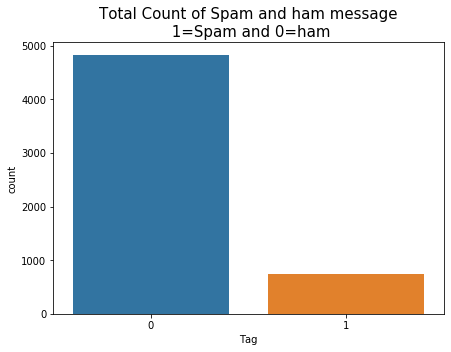

In [27]:
sms_df.drop(['Message','Message_length'],axis=1,inplace=True)

plt.figure(figsize=(7,5))
sns.countplot(x='Tag',data=sms_df)
plt.title('Total Count of Spam and ham message\n 1=Spam and 0=ham',size=15)

In [28]:
sms_df['Number_count']=sms_df['Message_stop'].apply(lambda x:len(''.join([n for n in x if n.isdigit()])))

In [26]:
sms_df.head()

,Tag,Message,Message_length,Message_stop,Message_length_stop
0,0,"Go until jurong point, crazy.. Available only ...",111,"Go jurong point, crazy.. Available bugis n gre...",91
1,0,Ok lar... Joking wif u oni...,29,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,Free entry 2 wkly comp win FA Cup final tkts 2...,141
3,0,U dun say so early hor... U c already then say...,49,U dun say early hor... U c already say...,41
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"Nah I think goes usf, lives around though",41


In [29]:
sms_df.head(6)

,Tag,Message_stop,Message_length_stop,Number_count
0,0,"Go jurong point, crazy.. Available bugis n gre...",91,0
1,0,Ok lar... Joking wif u oni...,29,0
2,1,Free entry 2 wkly comp win FA Cup final tkts 2...,141,25
3,0,U dun say early hor... U c already say...,41,0
4,0,"Nah I think goes usf, lives around though",41,0
5,1,FreeMsg Hey darling 3 week's word back! I'd li...,96,4


In [30]:
X=sms_df['Message_stop']
y=sms_df['Tag']

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [40]:
sms_df.to_csv('alt.csv')

In [31]:
# # CountVectorizer
count=CountVectorizer(min_df=5,ngram_range=[3,6],analyzer='char').fit(X_train)
X_train_Count=count.transform(X_train)
X_test_Count=count.transform(X_test)

#TfidfVectorizer

Tfid=TfidfVectorizer(min_df=5,ngram_range=[3,6],analyzer='char').fit(X_train)
X_train_Tfid=Tfid.transform(X_train)
X_test_Tfid=Tfid.transform(X_test)

In [32]:
clf=MultinomialNB(alpha=0.1)
clf.fit(X_train_Count,y_train)
train_pred=clf.predict(X_train_Count)
print('ROC score of Training by applying Countvectorizer:',roc_auc_score(train_pred,y_train))
pred_count=clf.predict(X_test_Count)
print('ROC score of Testing by applying Countvectorizer:',roc_auc_score(y_test,pred_count))

ROC score of Training by applying Countvectorizer: 0.9757569655748464
ROC score of Testing by applying Countvectorizer: 0.9750967692647232


In [34]:
x=['do you have plans for weekend?, let us meet at our usual place',
  'Hii, you are our lucky customer, you have won 100000000 Rs, Please provide your account details we will transfer the amount',
  'Subscribe to our account and click on this link to win a $10000 Amazon gift card',
  'Hi, Pooja you have been selected for the First round of interview with Wipro, you need to visit our campus on Next Monday']
data=pd.Series(x)
trans=count.transform(data)
clf.predict(trans)

array([0, 1, 1, 0])

In [35]:
clf=MultinomialNB(alpha=0.1)
clf.fit(X_train_Tfid,y_train)
train_pred=clf.predict(X_train_Tfid)
print('ROC score of Training by applying TFidVectorizer:',roc_auc_score(train_pred,y_train))
pred_tfid=clf.predict(X_test_Tfid)
print('ROC score of Testing by applying TFidVectorizer:',roc_auc_score(y_test,pred_tfid))

ROC score of Training by applying TFidVectorizer: 0.9854379905332146
ROC score of Testing by applying TFidVectorizer: 0.974230939001409


In [36]:
import joblib
joblib.dump(clf, 'spam.pkl', compress=9)

['spam.pkl']

In [42]:
yeet = count.transform(["$500 checking account"])

clf2 = joblib.load('spam.pkl')
clf.predict(yeet)

array([0])